# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Import Modules


In [1]:
#Analysis
# The parabolic nature of the temperature scatter plot shows that there is a tendency for temperature to increase as we approach the equator from north as well as south of the equator.
# However, temperature is observed to peak between 20 to 40 degrees latitude, based on random output.
# Humidity levels tend to be higher in cities located in and within proximity of the equator.
# Wind speeds tend to be lower in cities located in and within proximity of the equator. 
# No observable trend seen for cloudiness.


In [2]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import requests
import time
import os
import csv
import datetime
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



## Generate Cities List

In [3]:
# Initialize list for holding latitude, longitude, cities and counter
counter = 0
randlat = []
randlon = []
cities = []

# Create a set of random lat and lng combinations
while len(randlat) < 900:
    lat = np.random.uniform(-90, 90)
    lon = np.random.uniform(-180,180)
    city = citipy.nearest_city(lat, lon).city_name
    if city not in cities:
        randlat.append(lat)
        randlon.append(lon)
        cities.append(city)
        counter += 1

# Create a dataframe to summarize data collected.
locationdf = pd.DataFrame({"City":cities,"Latitude":randlat,"Longitude":randlon,}) 

# Inspect the first 5 rows of the data.
locationdf.head()
  

,City,Latitude,Longitude
0,preeceville,52.017563,-103.052427
1,khatanga,84.294941,103.121350
2,vestmannaeyjar,53.703893,-20.675592
3,nizhneyansk,78.322515,139.869395
4,qaqortoq,63.871353,-44.493406


In [4]:
#Verify length of cities, as instructed here
len(cities)

900

In [5]:
#Check the count for each column of data.
locationdf.count()


City         900
Latitude     900
Longitude    900
dtype: int64

In [6]:
#Check value counts to ensure no duplications.
locationdf["City"].value_counts()

nemuro                          1
manzanillo                      1
roros                           1
victor harbor                   1
saint-philippe                  1
castro                          1
dingle                          1
kaeo                            1
aflu                            1
matara                          1
iqaluit                         1
pires do rio                    1
olafsvik                        1
coxim                           1
santa fe                        1
tulsa                           1
winslow                         1
san jose                        1
alyangula                       1
saint-pierre                    1
kamenka                         1
teguise                         1
norrtalje                       1
tromso                          1
sorland                         1
naliya                          1
kaitangata                      1
hermanus                        1
pala                            1
wenling       

In [7]:
# Check data types.
locationdf.dtypes


City          object
Latitude     float64
Longitude    float64
dtype: object

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [8]:
# Initalize lists to be used to collect the data from a series of API Calls.
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []
newcities = []

# Initialize counters to be used.
recordcount = 0
setcount = 0

In [9]:
# Define url.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Print below to signal beginning of data retrieval.
print("------------------------")
print("Beginning Data Retrieval")
print("------------------------")

# Run a loop to query weather conditions in each city.
for city in cities:
    query_url = url + "&q=" + city
    
    # Collect weather data and display record count and set count.
    response = requests.get(query_url).json()
    if recordcount < 50:
        recordcount += 1
    else:
        setcount += 1
        recordcount = 0
    # Mark beginning of data retrieval
    print(f"Processing record {recordcount} of set {setcount} | {city}")
         
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind.append(response["wind"]["speed"])
        newcities.append(city)
    except:
        print(f"{city} not found!")
        continue
# Mark end of data retrieval        
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | preeceville
Processing record 2 of set 0 | khatanga
Processing record 3 of set 0 | vestmannaeyjar
Processing record 4 of set 0 | nizhneyansk
nizhneyansk not found!
Processing record 5 of set 0 | qaqortoq
Processing record 6 of set 0 | barrow
Processing record 7 of set 0 | naze
Processing record 8 of set 0 | castro
Processing record 9 of set 0 | bredasdorp
Processing record 10 of set 0 | upernavik
Processing record 11 of set 0 | mataura
Processing record 12 of set 0 | illoqqortoormiut
illoqqortoormiut not found!
Processing record 13 of set 0 | leningradskiy
Processing record 14 of set 0 | albany
Processing record 15 of set 0 | amderma
amderma not found!
Processing record 16 of set 0 | berlevag
Processing record 17 of set 0 | okhotsk
Processing record 18 of set 0 | embu
Processing record 19 of set 0 | yellowknife
Processing record 20 of set 0 | dikson
Processing record 21 of set 0 | 

Processing record 34 of set 3 | tsarychanka
Processing record 35 of set 3 | anaconda
Processing record 36 of set 3 | lastoursville
Processing record 37 of set 3 | pires do rio
Processing record 38 of set 3 | port elizabeth
Processing record 39 of set 3 | richards bay
Processing record 40 of set 3 | manicore
Processing record 41 of set 3 | abu samrah
Processing record 42 of set 3 | jinchengjiang
jinchengjiang not found!
Processing record 43 of set 3 | labuhan
Processing record 44 of set 3 | lorengau
Processing record 45 of set 3 | marcona
marcona not found!
Processing record 46 of set 3 | husavik
Processing record 47 of set 3 | port hedland
Processing record 48 of set 3 | ucluelet
Processing record 49 of set 3 | bilkha
Processing record 50 of set 3 | costa rica
Processing record 0 of set 4 | jalingo
Processing record 1 of set 4 | chokurdakh
Processing record 2 of set 4 | belushya guba
belushya guba not found!
Processing record 3 of set 4 | saint-augustin
Processing record 4 of set 4 | r

Processing record 22 of set 7 | ayolas
Processing record 23 of set 7 | vanavara
Processing record 24 of set 7 | samarai
Processing record 25 of set 7 | sahuaripa
Processing record 26 of set 7 | cheuskiny
cheuskiny not found!
Processing record 27 of set 7 | brigantine
Processing record 28 of set 7 | udachnyy
Processing record 29 of set 7 | norrtalje
Processing record 30 of set 7 | puerto ayacucho
Processing record 31 of set 7 | port-cartier
Processing record 32 of set 7 | kaitangata
Processing record 33 of set 7 | sabang
Processing record 34 of set 7 | parati
Processing record 35 of set 7 | salalah
Processing record 36 of set 7 | ballina
Processing record 37 of set 7 | honningsvag
Processing record 38 of set 7 | odweyne
odweyne not found!
Processing record 39 of set 7 | nalut
Processing record 40 of set 7 | kamenskoye
kamenskoye not found!
Processing record 41 of set 7 | mabaruma
Processing record 42 of set 7 | chagda
chagda not found!
Processing record 43 of set 7 | ust-tsilma
Processi

Processing record 5 of set 11 | korfovskiy
Processing record 6 of set 11 | tessalit
Processing record 7 of set 11 | tiruchchendur
Processing record 8 of set 11 | gurupi
Processing record 9 of set 11 | yeppoon
Processing record 10 of set 11 | wenling
Processing record 11 of set 11 | sicuani
Processing record 12 of set 11 | gisborne
Processing record 13 of set 11 | morondava
Processing record 14 of set 11 | starokostyantyniv
Processing record 15 of set 11 | mayo
Processing record 16 of set 11 | rumoi
Processing record 17 of set 11 | ugoofaaru
Processing record 18 of set 11 | ulaangom
Processing record 19 of set 11 | benguela
Processing record 20 of set 11 | tiarei
Processing record 21 of set 11 | altdorf
Processing record 22 of set 11 | high level
Processing record 23 of set 11 | natal
Processing record 24 of set 11 | mecca
Processing record 25 of set 11 | kalbay
Processing record 26 of set 11 | iguape
Processing record 27 of set 11 | yokadouma
Processing record 28 of set 11 | port blair

Processing record 42 of set 14 | mahajanga
Processing record 43 of set 14 | sorland
Processing record 44 of set 14 | bulgan
Processing record 45 of set 14 | manzanillo
Processing record 46 of set 14 | pasighat
Processing record 47 of set 14 | piojo
piojo not found!
Processing record 48 of set 14 | koumac
Processing record 49 of set 14 | krutinka
Processing record 50 of set 14 | sorong
Processing record 0 of set 15 | prieska
Processing record 1 of set 15 | genhe
Processing record 2 of set 15 | zastron
Processing record 3 of set 15 | aykhal
Processing record 4 of set 15 | ponta delgada
Processing record 5 of set 15 | tiznit
Processing record 6 of set 15 | sao joao da barra
Processing record 7 of set 15 | reims
Processing record 8 of set 15 | charters towers
Processing record 9 of set 15 | nicolas bravo
Processing record 10 of set 15 | azimur
azimur not found!
Processing record 11 of set 15 | beyneu
Processing record 12 of set 15 | majene
Processing record 13 of set 15 | antanifotsy
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Create a dataframe with all data gathered from the series of API calls.
cityweatherdf = pd.DataFrame({"City" : newcities,
                              "Cloudiness (%)" : cloudiness,
                              "Country" : country,
                              "Date" : date,
                              "Humidity (%)" : humidity,
                              "Latitude" : lat,
                              "Longitude" : lng,
                              "Max Temp (F)" : temp,
                              "Wind Speed (mph)": wind})

# Display first 5 rows of the dataframe
cityweatherdf.head()

,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Max Temp (F),Wind Speed (mph)
0,preeceville,62,CA,1562795664,60,51.95,-102.67,69.82,7.54
1,khatanga,34,RU,1562795508,62,71.98,102.47,52.17,8.66
2,vestmannaeyjar,98,IS,1562795664,82,63.44,-20.27,52.35,6.35
3,qaqortoq,20,GL,1562795665,44,60.72,-46.03,59.00,11.41
4,barrow,83,AR,1562795665,66,-38.31,-60.23,52.90,1.88


In [11]:
# Display statistical overview
cityweatherdf.describe()

,Cloudiness (%),Date,Humidity (%),Latitude,Longitude,Max Temp (F),Wind Speed (mph)
count,811.000000,8.110000e+02,811.000000,811.000000,811.000000,811.000000,811.000000
mean,46.255240,1.562796e+09,70.607891,20.501652,20.600703,69.007904,7.414636
std,40.018825,1.125000e+02,21.961226,32.475592,87.649522,13.769568,5.190694
min,0.000000,1.562795e+09,1.000000,-54.810000,-173.980000,31.470000,0.110000
25%,0.000000,1.562796e+09,56.000000,-5.885000,-57.960000,58.560000,3.380000
50%,40.000000,1.562796e+09,76.000000,24.390000,22.740000,69.820000,6.040000
75%,90.000000,1.562796e+09,88.000000,48.345000,98.230000,78.820000,9.875000
max,100.000000,1.562796e+09,100.000000,78.220000,179.320000,111.000000,33.330000


In [12]:
#Perform a count
cityweatherdf.count()

City                811
Cloudiness (%)      811
Country             811
Date                811
Humidity (%)        811
Latitude            811
Longitude           811
Max Temp (F)        811
Wind Speed (mph)    811
dtype: int64

In [13]:
#Perform value counts.
cityweatherdf["City"].value_counts()

nemuro                          1
kaeo                            1
coahuayana                      1
barrow                          1
acapulco                        1
wenling                         1
pala                            1
hermanus                        1
roros                           1
victor harbor                   1
castro                          1
dingle                          1
matara                          1
tromso                          1
iqaluit                         1
pires do rio                    1
coxim                           1
tulsa                           1
winslow                         1
san jose                        1
alyangula                       1
saint-pierre                    1
kamenka                         1
teguise                         1
trier                           1
zhangye                         1
nanortalik                      1
diamantino                      1
humberto de campos              1
mirnyy        

In [14]:
# Drop null values and duplicates, if any
cleancityweatherdf = cityweatherdf.dropna(how = "any").drop_duplicates(subset=["City", "Wind Speed (mph)"], keep=False)

# Display clean dataframe
cleancityweatherdf

,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Max Temp (F),Wind Speed (mph)
0,preeceville,62,CA,1562795664,60,51.95,-102.67,69.82,7.54
1,khatanga,34,RU,1562795508,62,71.98,102.47,52.17,8.66
2,vestmannaeyjar,98,IS,1562795664,82,63.44,-20.27,52.35,6.35
3,qaqortoq,20,GL,1562795665,44,60.72,-46.03,59.00,11.41
4,barrow,83,AR,1562795665,66,-38.31,-60.23,52.90,1.88
5,naze,98,NG,1562795666,95,5.43,7.07,71.97,2.71
6,castro,40,CL,1562795666,93,-42.48,-73.76,48.20,10.29
7,bredasdorp,0,ZA,1562795666,93,-34.53,20.04,48.20,8.05
8,upernavik,0,GL,1562795667,85,72.79,-56.15,42.64,11.52
9,mataura,90,NZ,1562795631,96,-46.19,168.86,45.00,1.99


In [15]:
# Create a CSV file and save the output of the weather results
outputfile = ("cities.csv")
with open(outputfile, "w") as datafile:
    cleancityweatherdf.to_csv(outputfile)



### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [16]:
# Format date to show current date on the plot
date = datetime.datetime.fromtimestamp(int(cityweatherdf["Date"][0])).strftime('%m/%d/%Y')

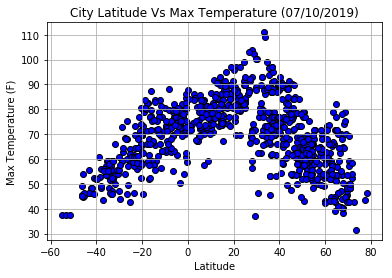

In [17]:
# Create and save Latitude vs. Temperature Plot
plt.scatter(x = cleancityweatherdf["Latitude"], y = cleancityweatherdf["Max Temp (F)"], c = "blue", edgecolor = "black")
plt.title("City Latitude Vs Max Temperature ({})".format(date) )
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Latitude_vs_Temperature.png")

#### Latitude vs. Humidity Plot

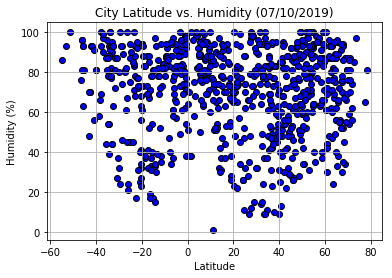

In [18]:
# Creat and save Latitude vs. Humidity Plot
plt.scatter(x = cleancityweatherdf["Latitude"], y = cleancityweatherdf["Humidity (%)"], c = "blue", edgecolor = "black")
plt.title("City Latitude vs. Humidity ({})".format(date) )
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Latitude_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

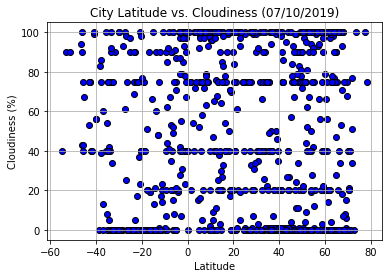

In [19]:
# Create and save Latitude vs. Cloudiness Plot
plt.scatter(x = cleancityweatherdf["Latitude"], y = cleancityweatherdf["Cloudiness (%)"], c = "blue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness ({})".format(date) )
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Latitude_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

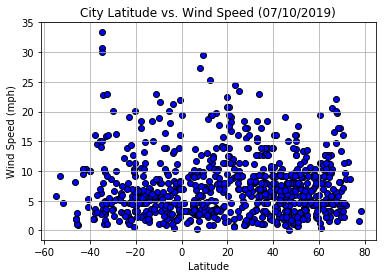

In [20]:
# Create and save Latitude vs. Wind Speed Plot
plt.scatter(x = cleancityweatherdf["Latitude"], y = cleancityweatherdf["Wind Speed (mph)"], c = "blue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed ({})".format(date) )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Latitude_vs_Wind_Speed.png")